## Basic usage



### TimeSeries

Diagnostic events are derived from from real occurances. For instance, your phone will probably generate a message (event) if your battery is running low (percentage below threshold value). The diagnostics library has a TimeSerie class that can capture these occurances.

For example, a `TimeSerie` representing your battery life, which drains 0.01% each second:

In [1]:
import numpy as np
import diagnostics as ds


battery_life = ds.TimeSerie(np.arange(100, 0, -0.01), fs=1)

the first argument is consists of a data array (both `list()` and `numpy.array()` are supported), and additionally you can provide some keyword parameters. Here we’ve provided the sample frequency (`fs`) which is 1 Hz, because we said our battery drains 0.01% each second. In this particular case we could’ve left `fs` out, since the default value of `fs` is also 1.

Now that we’ve got our data, we can easily visualize this:

No handles with labels found to put in legend.


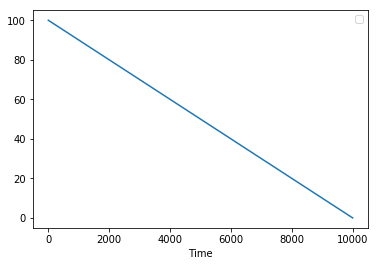

In [2]:
f = battery_life.plot()
# we can ignore the warning below

There are other keyword parameters that we can use as well, such as `t0` (start time of `TimeSerie` in posixtime or a `datetime` object), and a `name` (default is an empty string):

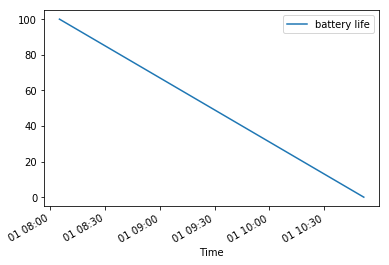

In [3]:
from datetime import datetime

battery_life = ds.TimeSerie(np.arange(100, 0, -0.01),
                            fs=1,
                            t0=datetime(2019,1,1,8,5), # 2019-01-01 08:05
                            name='battery life')

f = battery_life.plot(as_dt=True)

### BooleanTimeSeries

Let’s be honest, the battery percentage of your phone does not really matter to you, unless it goes below a certain threshold. Luckily for us, our `TimeSerie` can easily be converted to a `BooleanTimeSerie`, which only contains boolean values of when the percentage reaches below 25%:

No handles with labels found to put in legend.


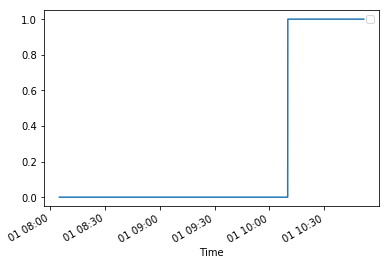

In [4]:
battery_below25 = battery_life <= 25

f = battery_below25.plot(as_dt=True)

Now that’s easy! We can see that our battery goes below 25% around 10:10.


### StateChangeArray

You could argue that our `BooleanTimeSerie` contains a lot of data points with the same value. I’d agree with you, and therefore introduce a class that only keeps track of the changes in data points, the `StateChangeArray`:

In [5]:
battery_low_state = battery_below25.to_statechangearray()
battery_low_state

StateChangeArray([False,  True], t=[1.5463299e+09, 1.5463374e+09], name='')

Alternatively, we can create a `StateChangeArray` (or `BooleanStateChangeArray`) from scratch:

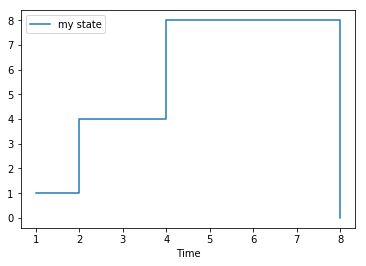

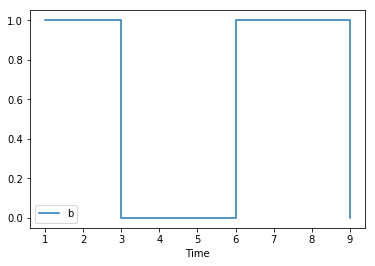

In [6]:
s = ds.StateChangeArray([1, 4, 8, 0], t=[1,2,4,8], name='my state')
b = ds.BooleanStateChangeArray([True, False, True, False], t=[1,3,6,9], name='b')

f = s.plot()
f = b.plot()

Both the data array as the values for time (`t`) can be `list()` or `np.array()`. When a list of `datetime` objects is given, they are converted to posixtime. Otherwise, the input is considered as posixtime. For now it is not possible to give a datetimearray as an input, but this wil be implemented in the near future.

### Comparing TimeSeries and StateChangeArrays

There are more classes besides `TimeSeries` and `StateChangearrays`, each with their own advantages and disadvantages. The power of this module lies in clear transformations from one class to another (we’ve already shown the `TimeSerie.to_statechangearray()` method), and the comparison of multiple classes.

To start with TimeSeries, if two (or more) have the same array_length, `t0` and `fs`, we can easily do calculations with them!

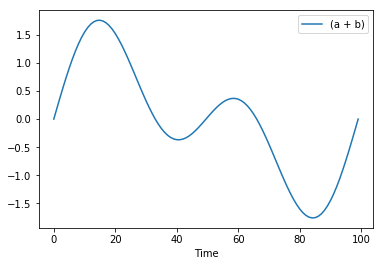

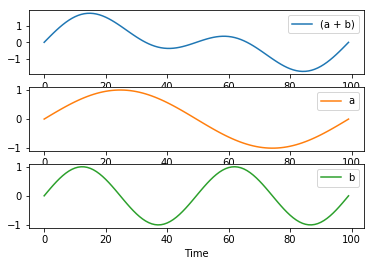

In [7]:
# create two TimeSerie objects that we'll combine
a = ds.TimeSerie(np.sin(np.linspace(0, 2*np.pi, 100)), t0=0, fs=1, name='a')
b = ds.TimeSerie(np.sin(2* np.linspace(0, 2*np.pi, 100)), t0=0, fs=1, name='b')

# It's this easy!
c = a + b
f = c.plot()
# we can even combine multiple TimeSeries in a single figure
f = c.plot(a, b)

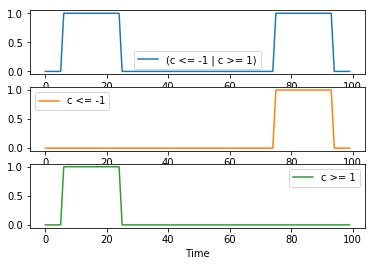

In [8]:
# We're interested in the more extreme values, lets create TimeSeries for these:
d = c <= -1
e = c >=  1

# we'll name them to keep our bookkeeping up to date
d.name = 'c <= -1'
e.name = 'c >= 1'

# and find when one of the above conditions is True!
f = d | e

# when performing boolean operators ('~', '^', '&', '|'), the library
# does it's own bookkeeping:
f = f.plot(d, e)

Comparing StateChangeArrays would normally be a bit tricky, since the data is most likely non-linearly spaced. This means that we can't just perform vectorized boolean operations, but we'll need to combine both data values as well as their respective points in time.

Luckily for us, the `StateChangeArray` has this built in:

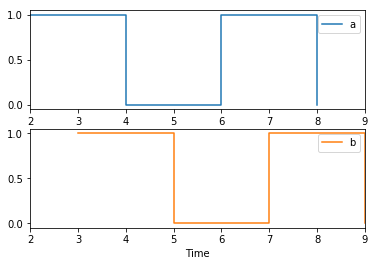

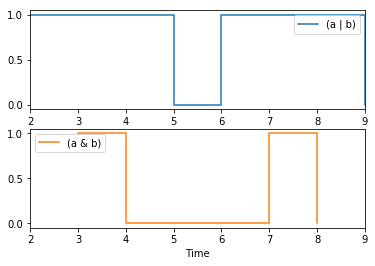

In [9]:
a = ds.StateChangeArray([True, False, True, False], t=[2,4,6,8], name='a')
b = ds.StateChangeArray([True, False, True, False], t=[3,5,7,9], name='b')

c = a | b
d = a & b
e = ~a
f = a ^ a
g = a ^ e

f = a.plot(b, align=True)
f = c.plot(d, align=True)

That’s pretty great right? 

### Reports & Events

WIP